# Covid19 Data Analysis
------------------------------------------

## Project Descriprion:
Is there any relationship between the spread of the Covid-19 Virus in a country and how happy people are living in that country

## Data:
We will combine the data from two Data Sets to solve this problem:
1. Covid 19 Data Set (Published by John Hopkins University).
   This data consists of cumulative number of confirmed cases in different countries per day.
 
2. World Happiness Report (Annual Publication of United Nations).
   This data consists of scores given by people those who are living in different countries. (freedom, healhty life expectancy, etc...

### Importing the modules 

In [9]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
print('Modules are imported.')

Modules are imported.


### Importing covid19 dataset
importing "Covid19_Confirmed_dataset.csv" from "datasets" folder. 


In [10]:
corona_df = pd.read_csv("datasets/covid19_Confirmed_dataset.csv")
corona_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [11]:
corona_df.describe(include='all')

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
count,82,266,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,...,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,2.660000e+02,2.660000e+02,2.660000e+02
unique,82,187,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,French Polynesia,China,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,21.259359,22.432499,2.086466,2.458647,3.537594,5.390977,7.962406,11.003759,...,9582.033835,9865.063910,10179.481203,10506.875940,10826.203008,11102.887218,11360.176692,1.163550e+04,1.191693e+04,1.224378e+04
std,NaN,NaN,24.747943,70.478908,27.279200,27.377862,34.083035,47.434934,66.289178,89.313757,...,55192.088929,56941.164602,58758.271305,60812.226451,62832.838104,64533.887576,65963.984777,6.750782e+04,6.918917e+04,7.102980e+04
min,NaN,NaN,-51.796300,-135.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,NaN,NaN,6.907750,-18.093125,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58.000000,62.250000,67.000000,72.250000,72.250000,74.000000,74.250000,7.500000e+01,7.600000e+01,7.725000e+01
50%,NaN,NaN,23.488100,20.921188,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,339.000000,342.500000,372.500000,403.000000,403.000000,423.000000,423.500000,4.335000e+02,4.555000e+02,4.665000e+02
75%,NaN,NaN,41.143200,77.191525,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1712.500000,1767.750000,1781.250000,1800.500000,1894.250000,1928.250000,1974.500000,2.020000e+03,2.047250e+03,2.105250e+03


#### Let's check the shape of the dataframe

In [12]:
corona_df.shape

(266, 104)

### Delete the unneeded columns

In [13]:
corona_df = corona_df.drop(columns = ["Lat", "Long"])
corona_df.head(2)

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773


In [14]:
corona_df["Country/Region"].value_counts()

China                       33
Canada                      15
United Kingdom              11
France                      11
Australia                    8
                            ..
Chile                        1
Guatemala                    1
Serbia                       1
Tunisia                      1
Central African Republic     1
Name: Country/Region, Length: 187, dtype: int64

In [15]:
corona_df[corona_df["Country/Region"] == "China"].head(10)

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
49,Anhui,China,1,9,15,39,60,70,106,152,...,991,991,991,991,991,991,991,991,991,991
50,Beijing,China,14,22,36,41,68,80,91,111,...,593,593,593,593,593,593,593,593,593,593
51,Chongqing,China,6,9,27,57,75,110,132,147,...,579,579,579,579,579,579,579,579,579,579
52,Fujian,China,1,5,10,18,35,59,80,84,...,355,355,355,355,355,355,355,355,355,356
53,Gansu,China,0,2,2,4,7,14,19,24,...,139,139,139,139,139,139,139,139,139,139
54,Guangdong,China,26,32,53,78,111,151,207,277,...,1582,1582,1585,1585,1586,1587,1587,1588,1588,1588
55,Guangxi,China,2,5,23,23,36,46,51,58,...,254,254,254,254,254,254,254,254,254,254
56,Guizhou,China,1,3,3,4,5,7,9,9,...,147,147,147,147,147,147,147,147,147,147
57,Hainan,China,4,5,8,19,22,33,40,43,...,168,168,168,168,168,168,168,168,168,168
58,Hebei,China,1,1,2,8,13,18,33,48,...,328,328,328,328,328,328,328,328,328,328


### Aggregating the rows by the country

In [16]:
corona_grp = corona_df.groupby("Country/Region").sum()
corona_grp.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,0,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,0,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,0,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [17]:
corona_grp.shape

(187, 100)

In [18]:
corona_grp.loc[["China"]]

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
China,548,643,920,1406,2075,2877,5509,6087,8141,9802,...,83853,83868,83884,83899,83909,83912,83918,83940,83944,83956


### Visualizing data related to a country for example China
visualization always helps for better understanding of our data.

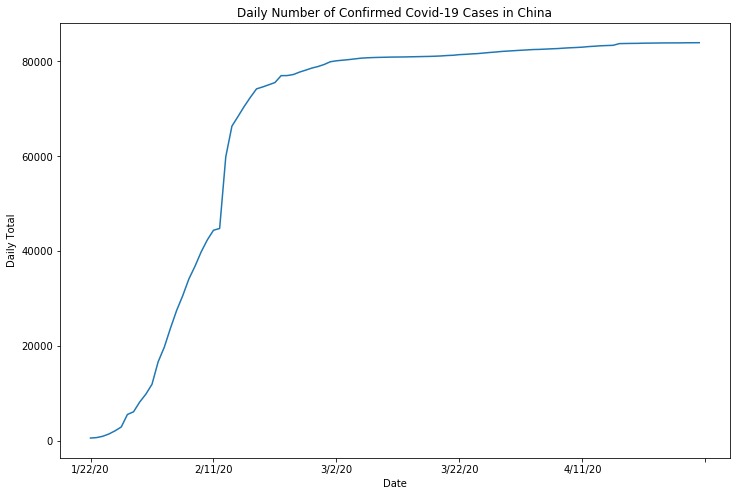

In [19]:
plt.figure(figsize = (12,8))

corona_grp.loc["China"].plot()
plt.title("Daily Number of Confirmed Covid-19 Cases in China")
plt.xlabel("Date")
plt.ylabel("Daily Total")
plt.show();

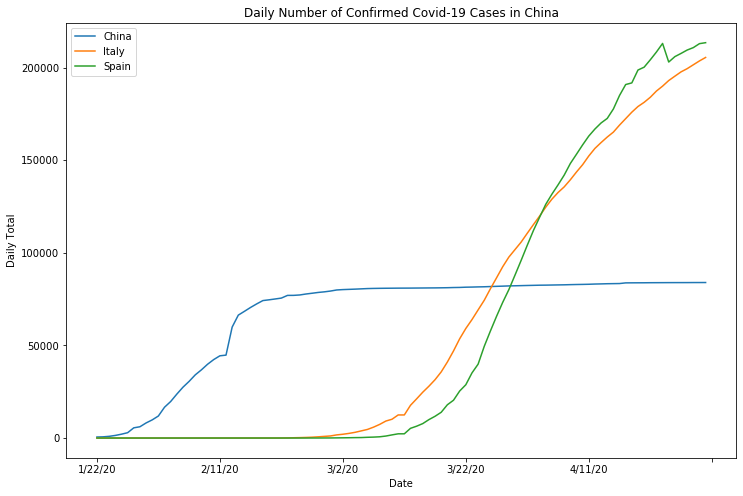

In [20]:
# Let's compare three countries (China vs Italy vs Spain)
plt.figure(figsize = (12,8))

corona_grp.loc["China"].plot()
corona_grp.loc["Italy"].plot()
corona_grp.loc["Spain"].plot()
plt.title("Daily Number of Confirmed Covid-19 Cases in China")
plt.xlabel("Date")
plt.ylabel("Daily Total")
plt.legend()
plt.show();

### Calculating a good measure 
we need to find a good measure reperestend as a number, describing the spread of the virus in a country. 

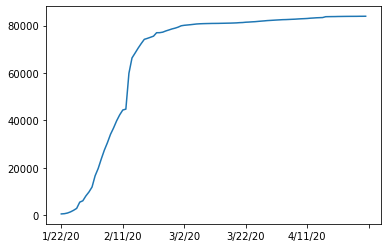

In [21]:
corona_grp.loc['China'].plot()

### caculating the first derivative of the curve

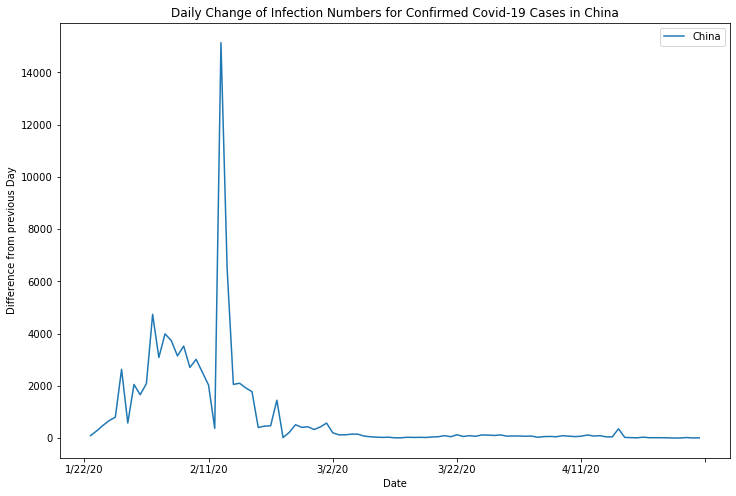

In [22]:
# Let's find the daily difference of confirmed cases in for China
plt.figure(figsize = (12,8))

corona_grp.loc["China"].diff().plot()
plt.title("Daily Change of Infection Numbers for Confirmed Covid-19 Cases in China")
plt.xlabel("Date")
plt.ylabel("Difference from previous Day")
plt.legend()
plt.show();

### finding maximum infected number of people in 24 hours for China, Italy and Spain

In [23]:
# Maximum case number for a 24 hours period for China
corona_grp.loc["China"].diff().max()

15136.0

In [24]:
# Maximum case number for a 24 hours period for Italy
corona_grp.loc["Italy"].diff().max()

6557.0

In [25]:
# Maximum case number for a 24 hours period for Italy
corona_grp.loc["Spain"].diff().max()

9630.0

### Task 3.3: find maximum infection count for all of the countries in 24 hours. 

In [26]:
countries = list(corona_grp.index)
countries[:5]

['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola']

In [27]:
max_inf_counts = []
for country in countries:
    max_count = corona_grp.loc[country].diff().max()
    max_inf_counts.append(max_count)

# check the results for the first 5 countries    
max_inf_counts[:5]

[232.0, 34.0, 199.0, 43.0, 5.0]

In [28]:
# adding this new results to our dataframe
corona_grp["max_inf_counts"] = max_inf_counts
corona_grp.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,max_inf_counts
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1176,1279,1351,1463,1531,1703,1828,1939,2171,232.0
Albania,0,0,0,0,0,0,0,0,0,0,...,634,663,678,712,726,736,750,766,773,34.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,2910,3007,3127,3256,3382,3517,3649,3848,4006,199.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,723,723,731,738,738,743,743,743,745,43.0
Angola,0,0,0,0,0,0,0,0,0,0,...,25,25,25,25,26,27,27,27,27,5.0


### Now moving to the Happiness Report Dataset 
- Importing the WorldHappinessReport.csv dataset
- selecting needed columns for our analysis 
- joining the datasets 
- calculating the correlations as the result of our analysis

### importing the dataset

In [29]:
happiness_df = pd.read_csv("datasets/worldwide_happiness_report.csv")
happiness_df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


### Task 4.2: let's drop the useless columns 

In [30]:
happiness_df.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [31]:
happiness_df.drop(columns=['Overall rank', 'Score', 'Generosity', 'Perceptions of corruption'], inplace=True)

In [32]:
happiness_df.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557


### Task 4.3: changing the indices of the dataframe

In [33]:
happiness_df.set_index("Country or region", inplace=True)
happiness_df.head(2)

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592


### Task4.4: now let's join two dataset we have prepared  

#### Corona Dataset :

In [34]:
corona_grp.shape

(187, 101)

#### wolrd happiness report Dataset :

In [35]:
happiness_df.shape

(156, 4)

The countries in both data sets are not exactly same so we will use inner join.

In [36]:
df_comb = corona_grp[["max_inf_counts"]].join(happiness_df, how="inner")
df_comb.head()

,max_inf_counts,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,232.0,0.350,0.517,0.361,0.000
Albania,34.0,0.947,0.848,0.874,0.383
Algeria,199.0,1.002,1.160,0.785,0.086
Argentina,291.0,1.092,1.432,0.881,0.471
Armenia,134.0,0.850,1.055,0.815,0.283


### correlation matrix 

In [37]:
# Let's see the correlation between infections and happines dataframes
df_comb.corr()

,max_inf_counts,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
max_inf_counts,1.000000,0.250118,0.191958,0.289263,0.078196
GDP per capita,0.250118,1.000000,0.759468,0.863062,0.394603
Social support,0.191958,0.759468,1.000000,0.765286,0.456246
Healthy life expectancy,0.289263,0.863062,0.765286,1.000000,0.427892
Freedom to make life choices,0.078196,0.394603,0.456246,0.427892,1.000000


### Visualization of the results
An Analysis is not finished unless you visualize the results in terms figures and graphs so that everyone can understand what you get out of this analysis

### Plotting GDP vs maximum Infection rate

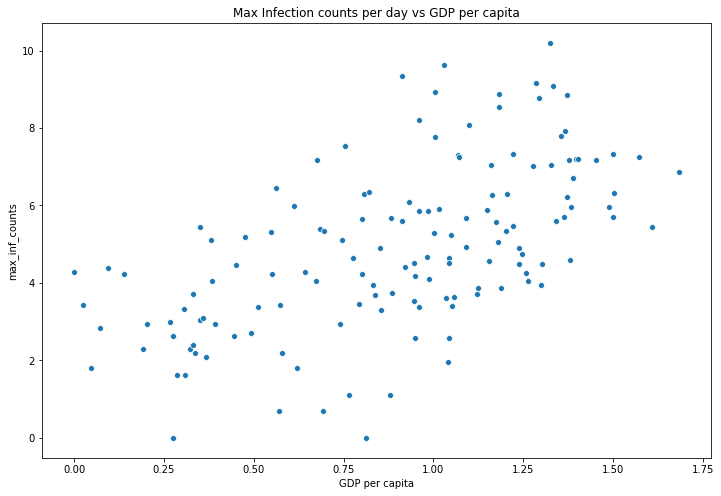

In [38]:
x = df_comb["GDP per capita"]
y = df_comb["max_inf_counts"]

plt.figure(figsize=(12,8))
plt.title("Max Infection counts per day vs GDP per capita")
sns.scatterplot(x, np.log(y));

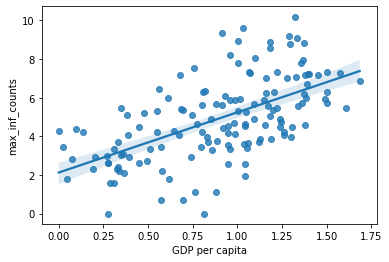

In [39]:
sns.regplot(x, np.log(y))

### Plotting Social support vs maximum Infection rate

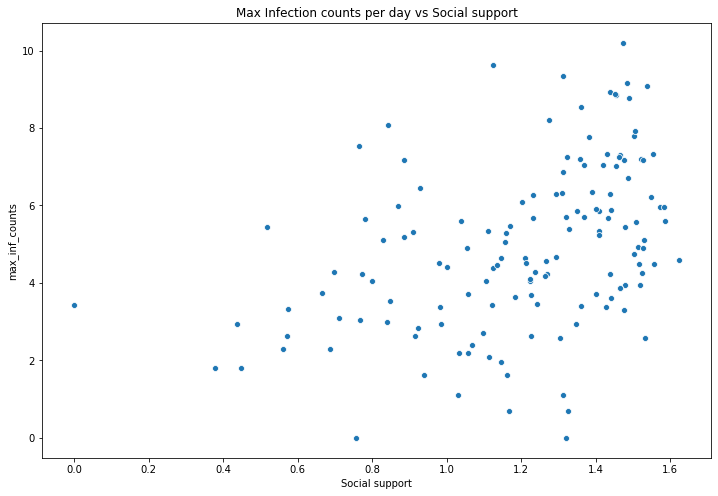

In [40]:
x = df_comb["Social support"]
y = df_comb["max_inf_counts"]

plt.figure(figsize=(12,8))
plt.title("Max Infection counts per day vs Social support")
sns.scatterplot(x, np.log(y));

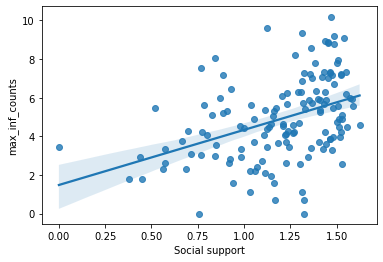

In [41]:
sns.regplot(x, np.log(y))

### Task 5.3: Plotting Healthy life expectancy vs maximum Infection rate

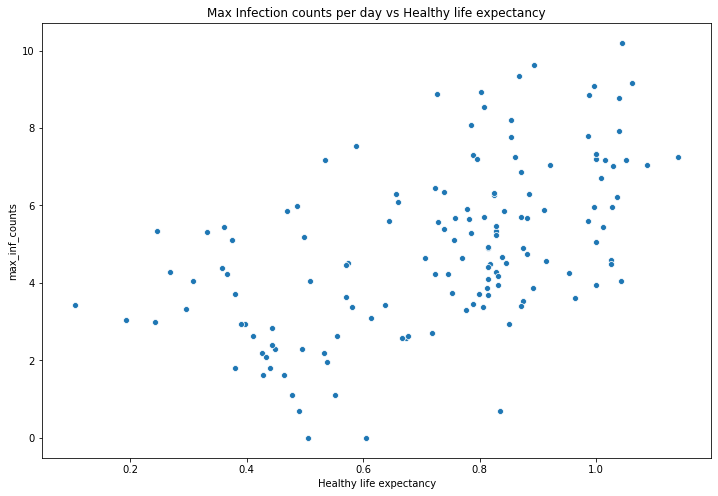

In [42]:
x = df_comb["Healthy life expectancy"]
y = df_comb["max_inf_counts"]

plt.figure(figsize=(12,8))
plt.title("Max Infection counts per day vs Healthy life expectancy")
sns.scatterplot(x, np.log(y));

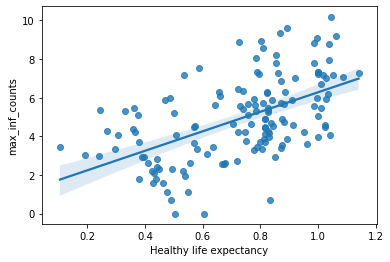

In [43]:
sns.regplot(x, np.log(y))

### Task 5.4: Plotting Freedom to make life choices vs maximum Infection rate

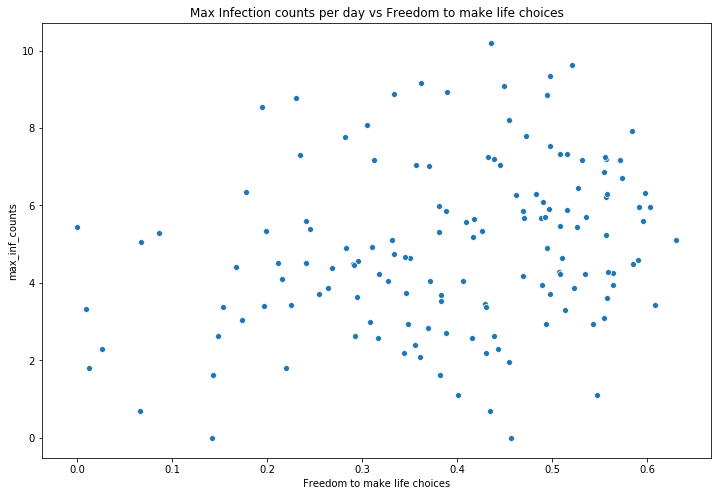

In [44]:
x = df_comb["Freedom to make life choices"]
y = df_comb["max_inf_counts"]

plt.figure(figsize=(12,8))
plt.title("Max Infection counts per day vs Freedom to make life choices")
sns.scatterplot(x, np.log(y));

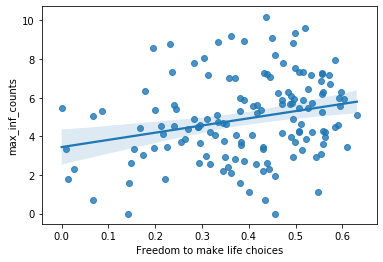

In [45]:
sns.regplot(x, np.log(y))